# IMPORT DEPENDENCIES AND DATA

In [ ]:
#pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipwidgets

In [ ]:
import tensorflow as tf
#Bringing the tensorflow datasets for fashion mnist
import tensorflow_datasets as tfds
#Bringing in matplotlib for viz stiff
import matplotlib.pyplot as plt

In [ ]:
#Use the tensorflow datasets api to bring in data source
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.XFDVRE_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.XFDVRE_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds.as_numpy_iterator().next()['label']

2

# **VISUALIZE DATA AND BUILD DATA**

In [ ]:
#Do some data transformation
import numpy as np

In [ ]:
#Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [ ]:
#Getting data out of pipepline
dataiterator.next()['image']

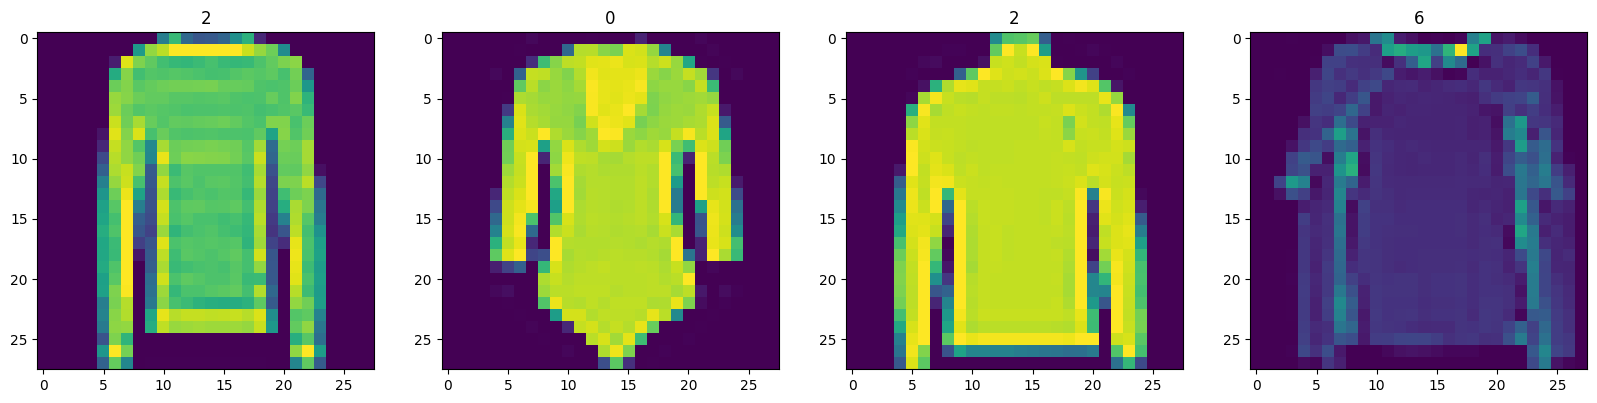

In [ ]:
#Setting the subl=plot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
#Loop 4 times to get images
for idx in range(4):
  #Grab the image using a specific subplot
  sample = dataiterator.next()
  #np.sqeeze for collabsing the array and plotting the images using a specific subplot
  ax[idx].imshow(np.squeeze(sample['image']))
  #Appending the image label as plot title
  ax[idx].title.set_text(sample['label'])

In [ ]:
#Scale and return images only
def scale_images(data):
  image = data['image']
  return image/255

In [ ]:
#Reload the dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
#Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# **BUILDING A NEURAL NETWORK**

In [ ]:
#Bring in the sequential API for the generator and discriminator
from tensorflow.keras.models import Sequential
#Bring in the layer for the neural network
from tensorflow.keras.layers import Conv2D, Reshape, Dense, Flatten, LeakyReLU, Dropout, UpSampling2D

**Build Generator**

In [ ]:
def build_generator():
  model = Sequential()

  model.add(Dense(7*7*128, input_dim=128)) #Giving 128 random images as input then converted into 7x7x128 shape into dense layer
  model.add(LeakyReLU(0.2)) #Activation function
  model.add(Reshape((7, 7, 128))) #Takes dense output and converting reshapes it to 7x7x128 -- Beginnings for the converted image

  #Upsampling Block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, kernel_size=5, padding='same'))
  model.add(LeakyReLU(0.2))

  #Upsampling Block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, kernel_size=5, padding='same'))
  model.add(LeakyReLU(0.2))

  #Convolutional Block 1
  model.add(Conv2D(128, kernel_size=4, padding='same'))
  model.add(LeakyReLU(0.2))

  #Convolutional Block 2
  model.add(Conv2D(128, kernel_size=4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to get to one channel
  model.add(Conv2D(1, kernel_size=4, padding='same', activation='sigmoid')) #Sigmoid give output as 0/1


  return model

In [ ]:
generator = build_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
img = generator.predict(np.random.randn(4,128,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
img.shape

(4, 28, 28, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


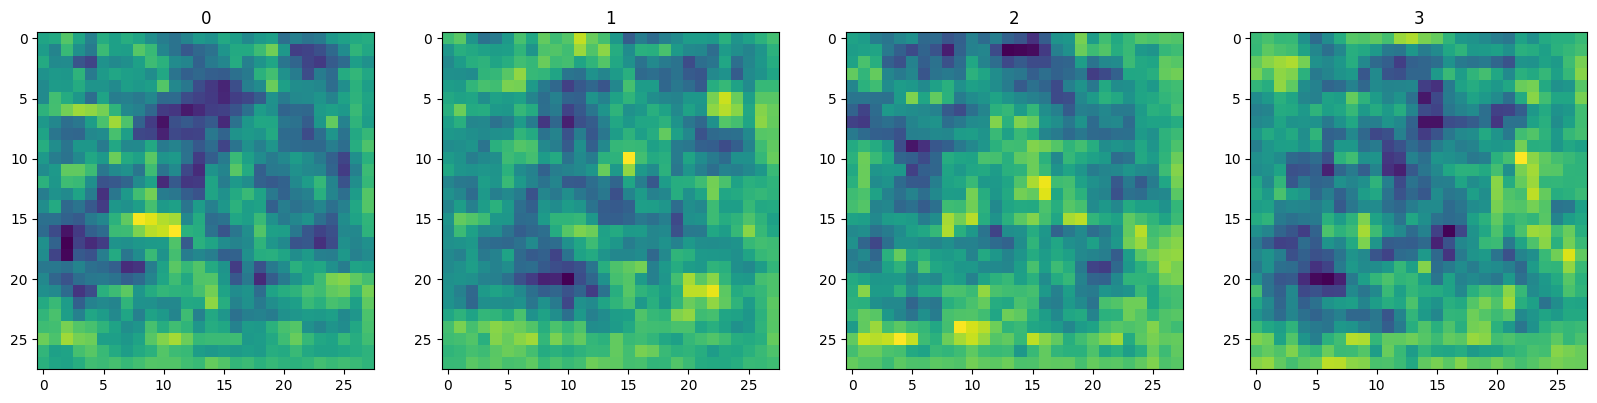

In [ ]:
#Generate new fashion
img = generator.predict(np.random.randn(4,128,1))  # 4 images as output, 128 random image as input

#Setting the subl=plot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
#Loop 4 times to get images
for idx, img in enumerate(img): #index and image of that index
  #np.sqeeze for collabsing the array and plotting the images using a specific subplot
  ax[idx].imshow(np.squeeze(img)) #To sqeeze the image
  #Appending the image label as plot title
  ax[idx].title.set_text(idx)

**BUILDING THE DISCRIMINATOR**

In [ ]:
def build_discriminator():
  model = Sequential()

  #First Conv Block
  model.add(Conv2D(32, kernel_size=5, input_shape=(28,28,1))) # 32 Filters used and generate image of 28x28x1
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.25))

  #Second Conv Block
  model.add(Conv2D(64, kernel_size=5)) # 64 Filters used and generate image of 28x28x1
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.25))

  #Third Conv Block
  model.add(Conv2D(128, kernel_size=5)) # 128 Filters used and generate image of 28x28x1
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.25))

  #Fourth Conv Block
  model.add(Conv2D(256, kernel_size=5)) # 256 Filters used and generate image of 28x28x1
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.25))

  #Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [ ]:
discriminator = build_discriminator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
img = img[0]

In [ ]:
img.shape

(4, 28, 28, 1)

# CONSTRUCT TRAINING LOOP

**SETUP lOSSES AND OPTIMIZERS**

In [ ]:
#Adam is going to be the optimizers for both
from tensorflow.keras.optimizers import Adam
#BinaryCrossentropy is going to be the Loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
#Learning rates of Optimizers
g_opt = Adam(learning_rate=0.0001) #fast
d_opt = Adam(learning_rate=0.00001) #slow
#Losses
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

**Build SubClassed Model**

In [ ]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [ ]:
tf.random.normal((6,128,1))

In [ ]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch): # batch of data 128 images of 28x28x1
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) # Taking the real images and passing to disc
            yhat_fake = self.discriminator(fake_images, training=True) # Taking the fake images and passing to disc
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0) # Concatenation of both samples

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [ ]:
#Create instance of subclasses model
fashgan = FashionGAN(generator, discriminator)

In [ ]:
#Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

**BUILD CALLBACK**

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('/content/GAN/images', f'generated_img_{epoch}_{i}.png'))

**TRAIN**

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [ ]:
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 212ms/step - d_loss: 0.6643 - g_loss: 0.8770
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 211ms/step - d_loss: 0.6979 - g_loss: 0.6599
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 210ms/step - d_loss: 0.6950 - g_loss: 0.6757
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 210ms/step - d_loss: 0.6949 - g_loss: 0.6684
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 210ms/step - d_loss: 0.6951 - g_loss: 0.6775
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 211ms/step - d_loss: 0.6936 - g_loss: 0.6946
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 211ms/step - d_loss: 0.6954 - g_loss: 0.6796
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 211ms/step - d_loss: 0.5475 - g_loss: 1.4376
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 210ms/step - d_loss: 0.2739 - g_loss: 2.6092
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 210ms/step - d_loss: 0.2711 - g_loss: 2.6258
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 210ms/step - d_loss: 0.2690 - g_loss: 2.6291
Epoch 12/20
469/4

**Review Performance**

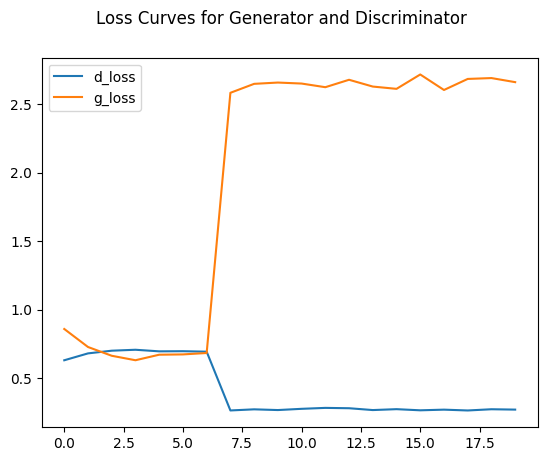

In [ ]:
plt.suptitle('Loss Curves for Generator and Discriminator')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# TEST OUT THE GENERATOR

**GENERATE IMAGES**

In [ ]:
imgs = generator.predict(tf.random.normal((16,128,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


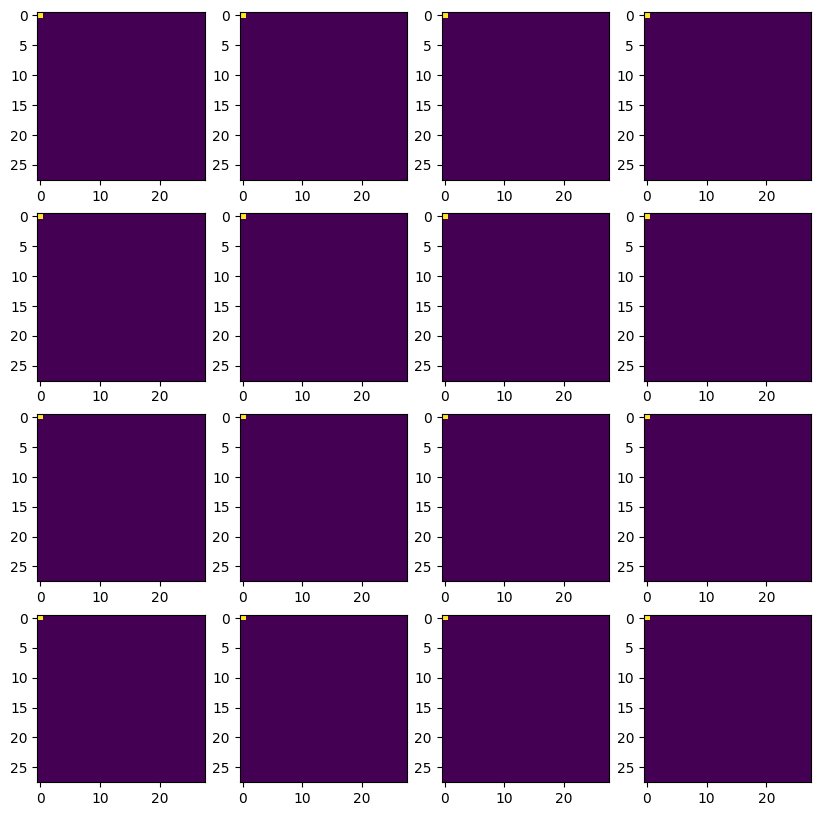

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4,  figsize=(10, 10))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

## SAVE THE MODEL

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')